In [7]:
%pylab
%matplotlib inline
from PIL import Image
from matplotlib.pyplot import imshow

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [ ]:
'''
A python implementation of 2D noise generator according to https://lodev.org/cgtutor/randomnoise.html
'''

In [382]:
def smooth_noise(x, y, noise, zoom=8):
    height = noise.shape[0]
    width = noise.shape[1]
    x = x/zoom
    y = y/zoom
    
    frac_x = x - int(x)
    frac_y = y - int(y)
    x1 = (int(x) + width) % width
    y1 = (int(y) + height) % height
    
    x2 = (x1 + width - 1) % width
    y2 = (y1 + height - 1) % height
    
    # bilinear interpolation
    i_x1 = frac_x * noise[y1][x1] + (1 - frac_x) * noise[y1][x2]
    i_x2 = frac_x * noise[y2][x1] + (1 - frac_x) * noise[y2][x2]
    new_noise = frac_y * i_x1 + (1 - frac_y) * i_x2
    # print(f"x={x}, y={y},x1={x1},y1={y1},x2={x2},y2={y2},frac_x={frac_x},frac_y={frac_y},zoom={zoom}, new_noise:{new_noise}")
    return new_noise

In [408]:
def turbulence(x, y, noise, size=64):
    init_size = size
    value = np.array([0.0, 0.0, 0.0])
    max_value = 0
    while size >= 1:
        weight = (float(size)/float(init_size)) # weight
        value += smooth_noise(x, y, noise, zoom=size) * weight 
        max_value += weight
        size /= 2
    value = value / max_value # normalize
    return value

In [486]:
def sinewave_noise(x, y, period= 10.0):
    noise = abs(np.sin((x + y) / period)) * 255.0
    return np.array([noise, noise, noise])

In [515]:
def marble_noise(x, y, noise, size=16, x_period=5, y_period=10, turb_power=10):
    xy_value = x / x_period + y / y_period + turb_power * turbulence(x, y, noise, size)/255
    noise = np.abs(sin(xy_value)) * 255
    return noise

In [579]:
def wood_noise(x, y, noise, size=16, period=1, turb_power=1):
    color = np.array([255,255,255])
    height = noise.shape[0]
    width = noise.shape[1]
    x_value = x - width/2
    y_value = y - height/2
    radians = sqrt(x_value**2 + y_value**2)/period + turb_power * turbulence(x, y, noise, size)/255
    noise = abs(sin(radians)) * color
    return noise

In [580]:
def random_noise(output, width, height, color=False, noise_filter="smooth", 
                 size=64, x_period=20, y_period= 20, period=1, turb_power=2):
    shape = (height, width, 3)
    noise_array = np.random.randint(0, 255, shape)  
    new_array = numpy.empty(shape)
    for w in range(width):
        for h in range(height):
            if noise_filter is "smooth":
                noise = smooth_noise(w, h, noise_array, size)
            elif noise_filter is "turbulence":
                noise = turbulence(w, h, noise_array, size)
            elif noise_filter is "sinewave":
                noise = sinewave_noise(w, h, period)
            elif noise_filter is "marble":
                noise = marble_noise(w, h, noise_array, size, x_period, y_period, turb_power)
            elif noise_filter is "wood":
                noise = wood_noise(w, h, noise_array, size, period, turb_power)
            else:
                noise = noise_array[int(h/size)][int(w/size)]
                
            if not color:
                c = noise[0]
                new_array[h][w][0] = new_array[h][w][1] = new_array[h][w][2]  = c
            else:
                new_array[h][w] = noise
                
    img = Image.fromarray(new_array.astype(np.uint8))
    img.save(output)
    imshow(img)
    return new_array

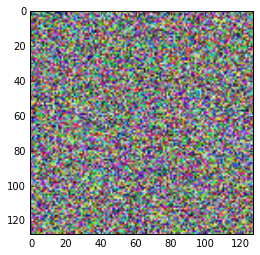

In [597]:
'''
Random noise
'''
array = random_noise("noise.png", 128, 128, color=True, noise_filter="none", size=1)

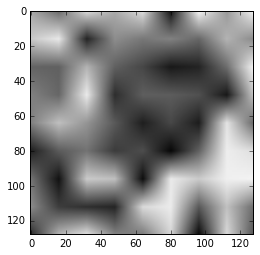

In [586]:
'''
Smooth noise
'''
array = random_noise("smooth_noise.png", 128, 128, color=False, noise_filter="smooth", size=16)

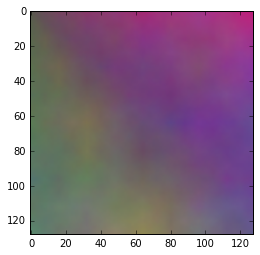

In [595]:
'''
Turbulence pattern
'''
array = random_noise("turbulence.png", 128, 128, color=True, noise_filter="turbulence", size=128)

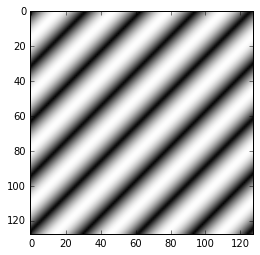

In [588]:
'''
Sine wave pattern
'''
array = random_noise("sine.png", 128, 128, color=False, noise_filter="sinewave", period=10)

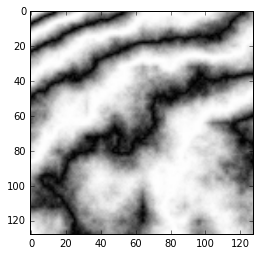

In [591]:
'''
Marble pattern
'''
array = random_noise("marble.png", 128, 128, color=False, noise_filter="marble", size=64, x_period=10, y_period=10, turb_power=10)

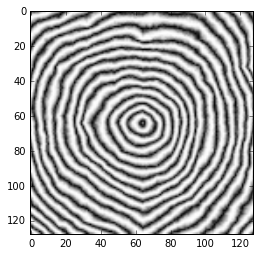

In [ ]:
'''
Wood pattern
'''
array = random_noise("wood.png", 128, 128, color=False, noise_filter="wood", size=64, period=2, turb_power=20)